In [1]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data and turn project path into a string
project_path = r'/Users/jerrysiphavong/Desktop/12-2024 Instacart Basket Analysis'

In [7]:
# import dataframe
df = pd.read_pickle(os.path.join(project_path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# Regional Segmentation

In [11]:
# Create region for Northeast
region_northeast = [
    'Maine',
    'New Hampshire',
    'Vermont',
    'Massachusetts',
    'Rhode Island',
    'Connecticut',
    'New York',
    'Pennsylvania',
    'New Jersey'
]

In [13]:
# Create region for Midwest
region_midwest = [
    'Wisconsin',
    'Michigan',
    'Illinois',
    'Indiana',
    'Ohio',
    'North Dakota',
    'South Dakota',
    'Nebraska',
    'Kansas',
    'Minnesota',
    'Iowa',
    'Missouri'
]

In [15]:
# Create region for South
region_south = [
    'Delaware',
    'Maryland',
    'District of Columbia',
    'Virginia',
    'West Virginia',
    'North Carolina',
    'South Carolina',
    'Georgia',
    'Florida',
    'Kentucky',
    'Tennessee',
    'Mississippi',
    'Alabama',
    'Oklahoma',
    'Texas',
    'Arkansas',
    'Louisiana'
]

In [17]:
# Create region for West
region_west = [
    'Idaho',
    'Montana',
    'Wyoming',
    'Nevada',
    'Utah',
    'Colorado',
    'Arizona',
    'New Mexico',
    'Alaska',
    'Washington',
    'Oregon',
    'California',
    'Hawaii'
]

In [20]:
# Create region column
df.loc[df['State'].isin(region_northeast), 'region'] = 'Northeast'
df.loc[df['State'].isin(region_midwest), 'region'] = 'Midwest'
df.loc[df['State'].isin(region_south), 'region'] = 'South'
df.loc[df['State'].isin(region_west), 'region'] = 'West'

In [25]:
df['region'].value_counts(dropna = False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

# Spending habits by region

In [30]:
region_ct = pd.crosstab(df['region'], df['spending_flag'], dropna = False)
region_ct['High spender % of total'] = region_ct['High spender'] / (region_ct['High spender'] + region_ct['Low spender'])

In [32]:
region_ct

spending_flag,High spender,Low spender,High spender % of total
region,,,
Midwest,156129,7447681,0.020533
Northeast,108343,5620004,0.018913
South,210182,10591428,0.019458
West,160807,8139638,0.019373


In [34]:
# The South region is the only region that eceeds $200k in high spenders
# The South region is the only region that exceen $10 Million in low spending
# The South region has the most high and low spenders
# The Northeast region has the lowest in high and low spender

# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [39]:
# Create a flag for customers with less than 5 orders
df.loc[df['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [41]:
# Use value_counts
df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30992664
low-activity customer      1441548
Name: count, dtype: int64

In [43]:
df['activity_flag'] = df['activity_flag'].astype('str')

In [45]:
# Exclude low-activity customers from the dataframe
df_excluded = df[df['activity_flag'] != 'low-activity customer']

In [47]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(project_path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

# Create a profiling variable based on age, income, certain goods in "department_id" column and number of dependants. You might also use the "orders_day_of_week" and "order_hour_of_day" columns if you think of a way they would impact cutomer profiles 

In [52]:
# create column age_group based on following categories:
# young adult: age < 26
# adult: 26 <= age < 65
# senior: age >= 65

In [56]:
df_excluded.loc[df['Age'] < 26, 'age_group'] = 'Young Adult'
df_excluded.loc[ (df['Age'] >= 26) & (df['Age'] < 65), 'age_group'] = 'Adult'
df_excluded.loc[df['Age'] >= 65, 'age_group'] = 'Senior'

/var/folders/7y/hwfhmtc156v42mtpc98vtk7c0000gn/T/ipykernel_1652/1271581661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df['Age'] < 26, 'age_group'] = 'Young Adult'


In [60]:
# create column income_group based on following categories:
# low: income < 50,000
# middle: 50,000 <= income < 100,000
# high: income >= 100,000
df_excluded.loc[df['Income'] < 40000, 'income_group'] = 'Low'
df_excluded.loc[ (df['Income'] >= 40000) & (df['Income'] < 100000), 'income_group'] = 'Middle'
df_excluded.loc[df['Income'] >= 100000, 'income_group'] = 'High'

/var/folders/7y/hwfhmtc156v42mtpc98vtk7c0000gn/T/ipykernel_1652/3924496561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df['Income'] < 40000, 'income_group'] = 'Low'


In [62]:
# create column dependent_group based on following categories:
# no dependents: n_dependents = 0
# has dependents: n_dependents > 0
df_excluded.loc[df['Number of Dependents'] == 0, 'dependant_group'] = 'No dependants'
df_excluded.loc[df['Number of Dependents'] > 0, 'dependant_group'] = 'Has dependants'

/var/folders/7y/hwfhmtc156v42mtpc98vtk7c0000gn/T/ipykernel_1652/1540943366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df['Number of Dependents'] == 0, 'dependant_group'] = 'No dependants'


In [64]:
# Department group - Pet Owners
# read department file
df_dep = pd.read_csv(os.path.join(project_path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [68]:
# create subset of users that ordered from pet department
df_pet_users = df_excluded[df_excluded['department_id'] == 8]['user_id'].unique()

In [70]:
# label user_ids who have purchased from pet department
df_excluded.loc[ df_excluded['user_id'].isin(df_pet_users), 'pet_owner'] = 'Y'

/var/folders/7y/hwfhmtc156v42mtpc98vtk7c0000gn/T/ipykernel_1652/1210204965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[ df_excluded['user_id'].isin(df_pet_users), 'pet_owner'] = 'Y'


In [72]:
df_excluded.loc[ ~df_excluded['user_id'].isin(df_pet_users), 'pet_owner'] = 'N'

In [76]:
# Single Adults
# create column young_adult based on following categories:
# Y: age_group == Young adult & fam_status == single
# N: 
df_excluded.loc[ ((df_excluded['age_group'] == 'Young Adult') | (df_excluded['age_group'] == 'Adult')) & (df_excluded['Family Status'] == 'single'), 'single_adult'] = 'Y'

/var/folders/7y/hwfhmtc156v42mtpc98vtk7c0000gn/T/ipykernel_1652/943247677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[ ((df_excluded['age_group'] == 'Young Adult') | (df_excluded['age_group'] == 'Adult')) & (df_excluded['Family Status'] == 'single'), 'single_adult'] = 'Y'


In [78]:
df_excluded.loc[ df_excluded['single_adult'].isnull(), 'single_adult'] = 'N'

# Create visualiation of distribution of profiles

In [81]:
# Age Groups
# group by age group and count the number of unique users
age_group_user_count = df_excluded.groupby('age_group')['user_id'].nunique().sort_values(ascending = True)

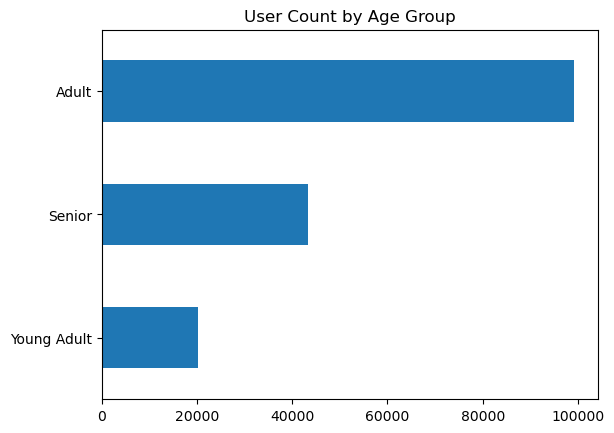

In [83]:
# plot visualization
age_group_user_count_bar = age_group_user_count.plot(
    kind = 'barh',
    title = 'User Count by Age Group',
    ylabel = ''
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_agegroup_usercount.png'))

In [85]:
# Income Groups 
# group by income group and count the number of unique users
income_group_user_count = df_excluded.groupby('income_group')['user_id'].nunique().sort_values(ascending = True)

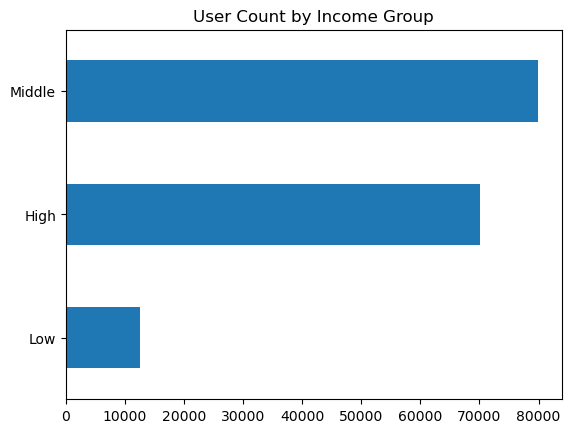

In [87]:
# plot visualization
income_group_user_count_bar = income_group_user_count.plot(
    kind = 'barh',
    title = 'User Count by Income Group',
    ylabel = ''
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_incomegroup_usercount.png'))

In [89]:
# Dependency Groups
# group by dependant_group and count the number of unique users
dependant_group_user_count = df_excluded.groupby('dependant_group')['user_id'].nunique().sort_values(ascending = True)

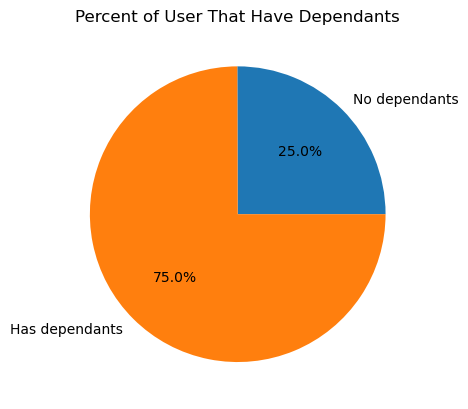

In [91]:
# plot visualization
dependancy_group_user_count_bar = dependant_group_user_count.plot(
    kind = 'pie',
    title = 'Percent of User That Have Dependants',
    ylabel = '',
    autopct='%1.1f%%'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_dependant_usercount.png'))

In [93]:
# Department Groups - Pet Owners
# group by pet owners and count the number of unique users
pet_owner_user_count = df_excluded.groupby('pet_owner')['user_id'].nunique().sort_values(ascending = True)

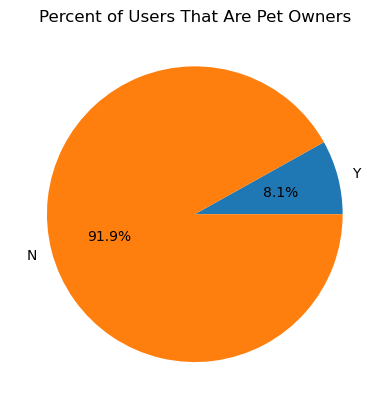

In [95]:
# plot visualization
pet_owner_user_count_bar = pet_owner_user_count.plot(
    kind = 'pie',
    title = 'Percent of Users That Are Pet Owners',
    ylabel = '',
    autopct='%1.1f%%'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_petowner_usercount.png'))

In [97]:
# Single Adults
# group by single and count the number of unique users
single_user_count = df_excluded.groupby('single_adult')['user_id'].nunique().sort_values(ascending = True)


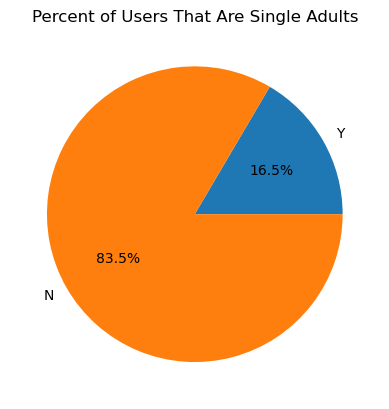

In [99]:
# plot visualization
single_user_count_bar = single_user_count.plot(
    kind = 'pie',
    title = 'Percent of Users That Are Single Adults',
    ylabel = '',
    autopct='%1.1f%%'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_singleadult_usercount.png'))

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [102]:
# aggregate df to customer level
df_3 = df_excluded.groupby(['user_id', 'max_order', 'age_group', 'income_group', 'dependant_group', 'pet_owner', 'single_adult', 'region']).agg(
    total_spent=('prices', 'sum'),
    order_frequency=('days_since_prior_order', 'mean')
).reset_index()

In [104]:
# check customer level
df_3.head()

,user_id,max_order,age_group,income_group,dependant_group,pet_owner,single_adult,region,total_spent,order_frequency
0,1,10,Adult,Middle,Has dependants,N,N,South,375.7,20.259259
1,10,5,Adult,Middle,Has dependants,N,N,South,1237.1,20.746377
2,100,5,Adult,High,Has dependants,N,N,South,266.2,26.320000
3,1000,7,Young Adult,Middle,Has dependants,N,N,South,866.0,11.647727
4,10000,72,Adult,Middle,No dependants,N,Y,South,8785.6,4.949580


In [106]:
df_3.shape

(162633, 10)

In [110]:
df_excluded['user_id'].nunique()

162633

In [112]:
# Age Group
df_3.groupby('age_group').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                  order_frequency                
                    mean   min        max            mean       min   max
age_group                                                                
Adult        2280.518189   5.0  2104114.1       14.363148  0.000000  30.0
Senior       2230.188266   6.8  1409778.9       14.306047  0.000000  30.0
Young Adult  2338.483993  10.5  2101976.9       14.334007  0.583333  30.0

In [114]:
# Income Group
df_3.groupby('income_group').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                  order_frequency           
                     mean   min        max            mean  min   max
income_group                                                         
High          3339.368216  35.3  2104114.1       14.175457  0.0  30.0
Low            831.938725   5.0    24319.3       15.233308  0.0  30.0
Middle        1568.286665   6.8  1102546.5       14.352012  0.0  30.0

In [116]:
# Dependency Group
df_3.groupby('dependant_group').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                 order_frequency           
                        mean  min        max            mean  min   max
dependant_group                                                        
Has dependants   2265.004682  6.8  2104114.1       14.338791  0.0  30.0
No dependants    2302.251154  5.0  2101976.9       14.360963  0.0  30.0

In [118]:
# Department Group - Pet Owners
df_3.groupby('pet_owner').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                  order_frequency                
                  mean   min        max            mean       min   max
pet_owner                                                              
N          2144.208091   5.0  2104114.1       14.439436  0.000000  30.0
Y          3750.468918  24.9  1206437.5       13.265605  0.717842  30.0

In [120]:
# Single Adults
df_3.groupby('single_adult').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                 order_frequency           
                     mean  min        max            mean  min   max
single_adult                                                        
N             2259.186817  6.8  2104114.1       14.332770  0.0  30.0
Y             2350.767393  5.0  2101976.9       14.402751  0.0  30.0

# Compare your customer profiles with regions and departments

In [123]:
# Regional Comparison

In [125]:
# Age Group
# group by region and age
age_region = df_3.groupby(['age_group', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [127]:
age_region

,age_group,region,user_count
0,Adult,Midwest,23499
1,Adult,Northeast,17527
2,Adult,South,32911
3,Adult,West,25249
4,Senior,Midwest,10169
5,Senior,Northeast,7580
6,Senior,South,14433
7,Senior,West,11068
8,Young Adult,Midwest,4709
9,Young Adult,Northeast,3474


In [129]:
# pivot to visualize
age_region_pivot = age_region.pivot(index='age_group', columns='region', values='user_count')

In [131]:
age_region_pivot

region,Midwest,Northeast,South,West
age_group,,,,
Adult,23499,17527,32911,25249
Senior,10169,7580,14433,11068
Young Adult,4709,3474,6850,5164


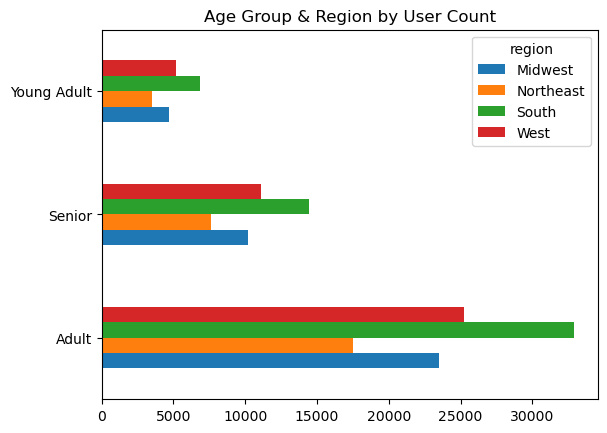

In [133]:
# visualize
age_region_usercount = age_region_pivot.plot(
    kind = 'barh',
    ylabel = '',
    title = 'Age Group & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_age_region_usercount.png'))

In [135]:
# Income Group
# group by region and income
income_region = df_3.groupby(['income_group', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [137]:
# pivot to visualize
income_region_pivot = income_region.pivot(index='income_group', columns='region', values='user_count')

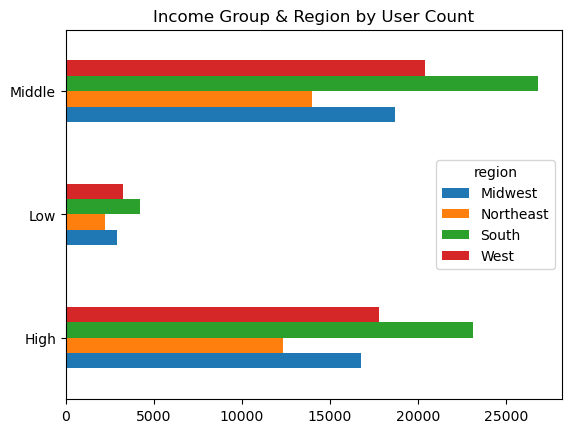

In [139]:
# visualize
income_region_pivot.plot(
    kind = 'barh',
    ylabel = '',
    title = 'Income Group & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_income_region_usercount.png'))

In [141]:
# Dependency Group
# group by region and income
dependancy_region = df_3.groupby(['dependant_group', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [143]:
# pivot to visualize
dependancy_region_pivot = dependancy_region.pivot(index='dependant_group', columns='region', values='user_count')

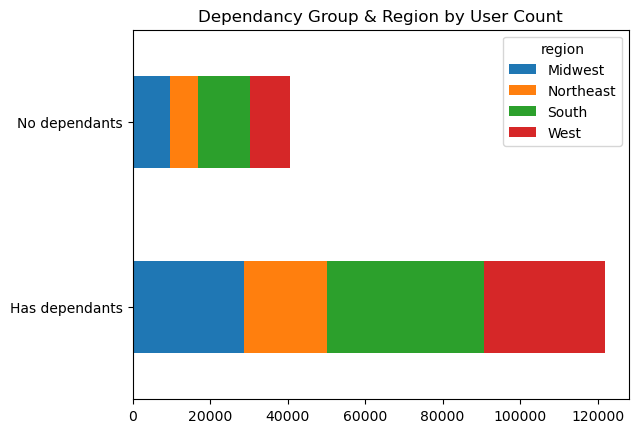

In [145]:
# visualize
dependancy_region_pivot.plot(
    kind = 'barh',
    stacked = True,
    ylabel = '',
    title = 'Dependancy Group & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_dependancy_region_usercount.png'))

In [147]:
# Department Group - Pet Owners
# group by region and income
pet_owner_region = df_3.groupby(['pet_owner', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [149]:
pet_owner_region

,pet_owner,region,user_count
0,N,Midwest,35264
1,N,Northeast,26282
2,N,South,49869
3,N,West,38043
4,Y,Midwest,3113
5,Y,Northeast,2299
6,Y,South,4325
7,Y,West,3438


In [151]:
# pivot to visualize
pet_owener_region_pivot = pet_owner_region.pivot(index='region', columns='pet_owner', values='user_count')

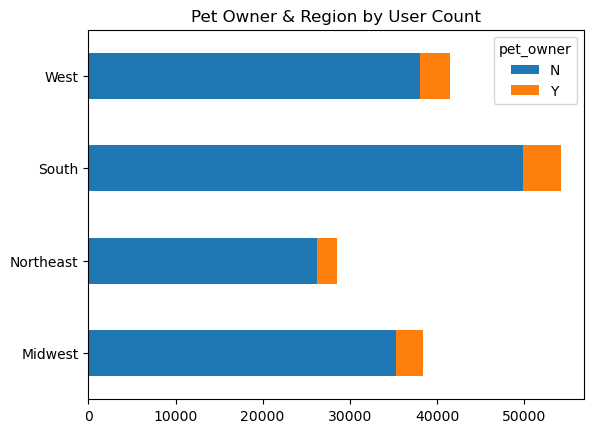

In [153]:
# visualize
pet_owner_region_user_count = pet_owener_region_pivot.plot(
    kind = 'barh',
    stacked = True,
    ylabel = '',
    title = 'Pet Owner & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_petowner_region_usercount.png'))

In [155]:
# Single Adults Group
# group by region and income
single_adult_region = df_3.groupby(['single_adult', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [157]:
single_adult_region

,single_adult,region,user_count
0,N,Midwest,32018
1,N,Northeast,23797
2,N,South,45262
3,N,West,34660
4,Y,Midwest,6359
5,Y,Northeast,4784
6,Y,South,8932
7,Y,West,6821


In [159]:
# pivot to visualize
single_adult_region_pivot = single_adult_region.pivot(index='region', columns='single_adult', values='user_count')

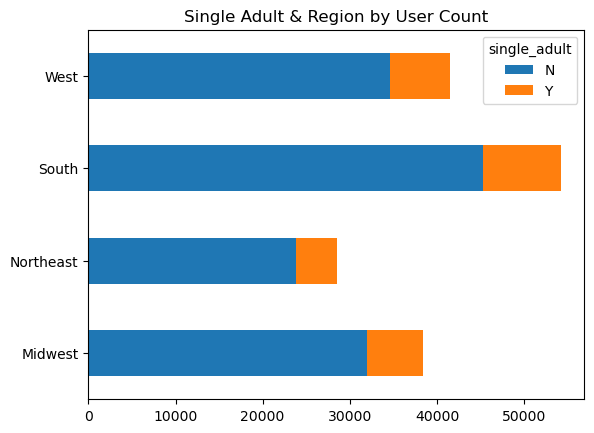

In [161]:
# visualize
single_adult_region_pivot.plot(
    kind = 'barh',
    stacked = True,
    ylabel = '',
    title = 'Single Adult & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_singleadult_region_usercount.png'))

In [163]:
# Department Comparison
# create df_4 for order and department level
# aggregate df to customer level
df_4 = df_excluded.groupby(['order_id', 'department_id', 'max_order', 'age_group', 'income_group', 'dependant_group', 'pet_owner', 'single_adult', 'region']).agg(
    total_spent=('prices', 'sum')
).reset_index()

In [165]:
df_dep.columns = ['department_id', 'department']

In [167]:
# merge df_4 with department name
df_4 = pd.merge(df_4, df_dep, on = 'department_id')

In [169]:
# get top 3 departments
top_3_departments = df_4.groupby(['department'])['order_id'].nunique().reset_index().sort_values(by = 'order_id', ascending = False)

In [171]:
# filter df_4 for top_3 departments only
top_3_departments = top_3_departments.reset_index(drop = True).head(3)

In [173]:
df_4 = df_4[df_4['department'].isin(top_3_departments['department'])]

In [175]:
# Age Groups
# group by department and age
age_department = df_4.groupby(['department', 'age_group'])['order_id'].nunique().reset_index(name='order_count')
age_department.head()

,department,age_group,order_count
0,beverages,Adult,848054
1,beverages,Senior,370488
2,beverages,Young Adult,172964
3,dairy eggs,Adult,1271469
4,dairy eggs,Senior,552389


In [177]:
# pivot to visualize
age_department_pivot = age_department.pivot(index='department', columns='age_group', values='order_count')

In [179]:
age_department_pivot

age_group,Adult,Senior,Young Adult
department,,,
beverages,848054,370488,172964
dairy eggs,1271469,552389,258719
produce,1404387,612013,287285


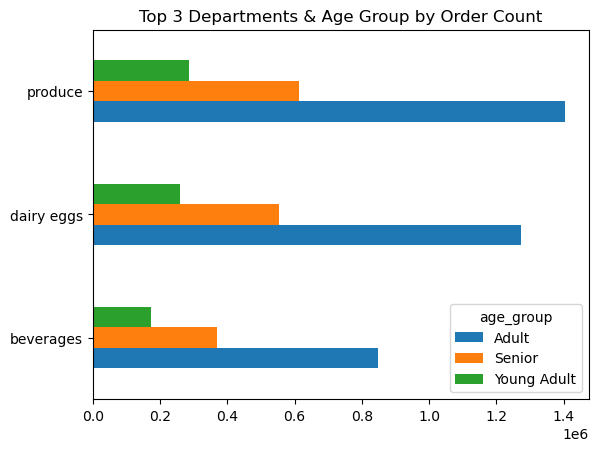

In [181]:
# visualize
age_department_pivot.plot(
    kind = 'barh',
    ylabel = '',
    title = 'Top 3 Departments & Age Group by Order Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_department_agegroup_usercount.png'))

In [183]:
# Income Groups
# group by department and income group
income_department = df_4.groupby(['department', 'income_group'])['order_id'].nunique().reset_index(name = 'order_count')

In [185]:
income_department.head()

,department,income_group,order_count
0,beverages,High,610742
1,beverages,Low,99074
2,beverages,Middle,681690
3,dairy eggs,High,952496
4,dairy eggs,Low,111022


In [187]:
# pivot to visualize
income_department_pivot = income_department.pivot(index='department', columns='income_group', values='order_count')

In [189]:
age_department_pivot

age_group,Adult,Senior,Young Adult
department,,,
beverages,848054,370488,172964
dairy eggs,1271469,552389,258719
produce,1404387,612013,287285


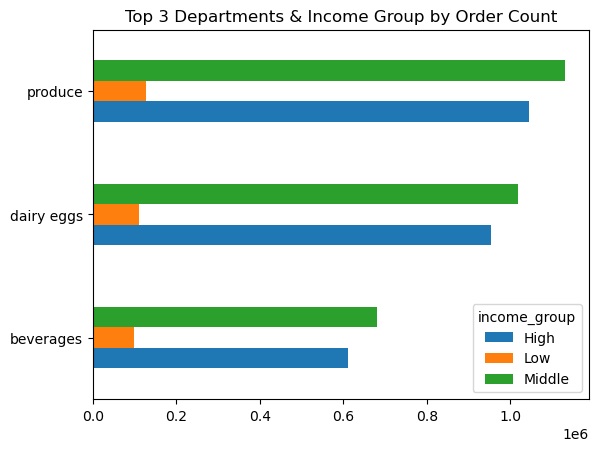

In [191]:
# visualize
income_department_pivot.plot(
    kind = 'barh',
    ylabel = '',
    title = 'Top 3 Departments & Income Group by Order Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_department_incomegroup_usercount.png'))

# The sales team needs to know what the busiest days of the week and hours of the day are in order to schedule ads at times when there are fewer orders

In [196]:
order_dow_frequency = df_excluded.groupby(['orders_day_of_week'])['order_id'].nunique().reset_index()

In [198]:
order_dow_frequency

,orders_day_of_week,order_id
0,0,529249
1,1,531282
2,2,421556
3,3,393465
4,4,383552
5,5,407491
6,6,397950


In [200]:
dow_map = {
    0: 'Sat',
    1: 'Sun',
    2: 'Mon',
    3: 'Tue',
    4: 'Wed',
    5: 'Thr',
    6: 'Fri'
}

In [202]:
order_dow_frequency['orders_day_of_week_name'] = order_dow_frequency['orders_day_of_week'].replace(dow_map)

In [204]:
order_dow_frequency

,orders_day_of_week,order_id,orders_day_of_week_name
0,0,529249,Sat
1,1,531282,Sun
2,2,421556,Mon
3,3,393465,Tue
4,4,383552,Wed
5,5,407491,Thr
6,6,397950,Fri


In [206]:
order_dow_frequency_2 = order_dow_frequency[['orders_day_of_week_name','order_id']].set_index('orders_day_of_week_name')

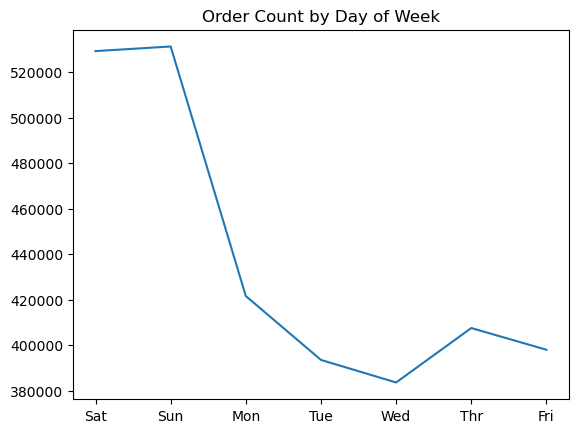

In [208]:
order_dow_frequency_2.plot(
    legend = False,
    title = 'Order Count by Day of Week',
    xlabel =''
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'order_count_by_dow.png'))

In [212]:
price_by_hod = df_excluded.groupby('order_hour_of_day').agg(sum_of_sales = ('prices','mean'))

<Axes: xlabel='order_hour_of_day'>

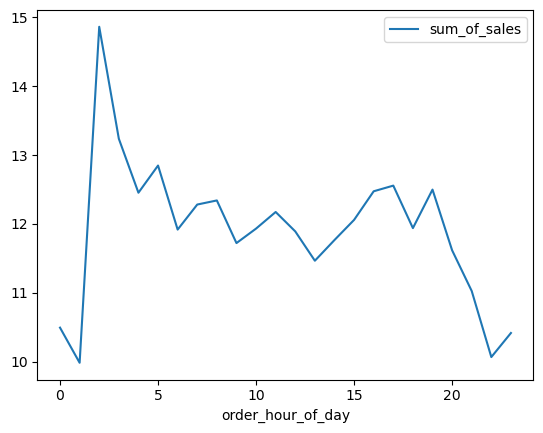

In [214]:
price_by_hod.plot()

# Instacart has a lot of products with different price tags. Marketing and sales wants to use simpler price range groupings to help direct their efforts

In [217]:
pd.set_option('display.max_columns', None)

In [219]:
df.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,average_spending,spending_flag,order_frequency,order_frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Midwest,high-activity customer


In [223]:
price_range = df_excluded.groupby('price_range_loc')['product_id'].nunique()

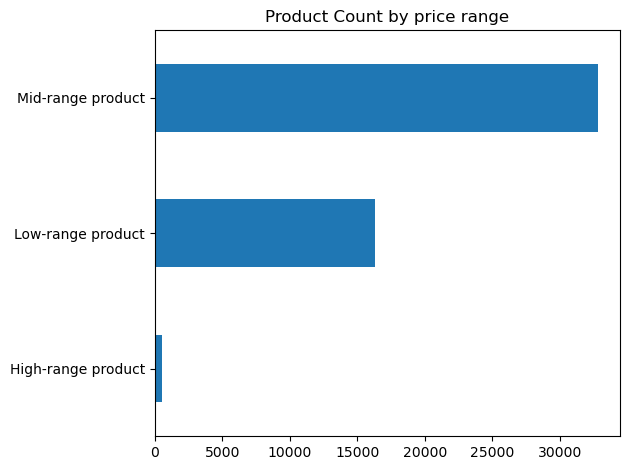

In [225]:
price_range.plot(
    kind = 'barh',
    title = 'Product Count by price range',
    ylabel =''
)
plt.tight_layout() # adjustment to see y label
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'product_count_by_price_range.png'))

# Are there certain types of products that are more popular than others The marketing and sales teams want to know which departments have the highest frequency of product orders

In [228]:
orders_by_department = df_excluded.groupby('department_id')['order_id'].nunique()

In [230]:
orders_by_department_bar = pd.merge(orders_by_department, df_dep, on = 'department_id').sort_values(by = 'order_id', ascending = True)

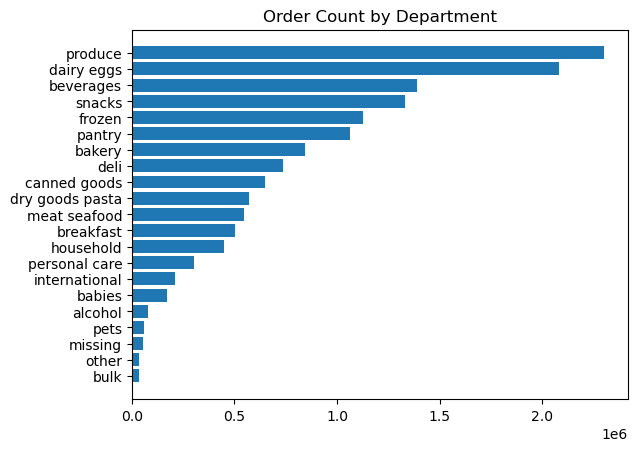

In [232]:
plt.barh(orders_by_department_bar['department'], orders_by_department_bar['order_id'])
plt.title('Order Count by Department')
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'order_count_by_department.png'))

# What's the distribution among users in regards to their brand loyalty? (i.e, how often do they return to instacart?)

In [235]:
users_by_loyalty = df_excluded.groupby('loyalty_flag')['user_id'].nunique()

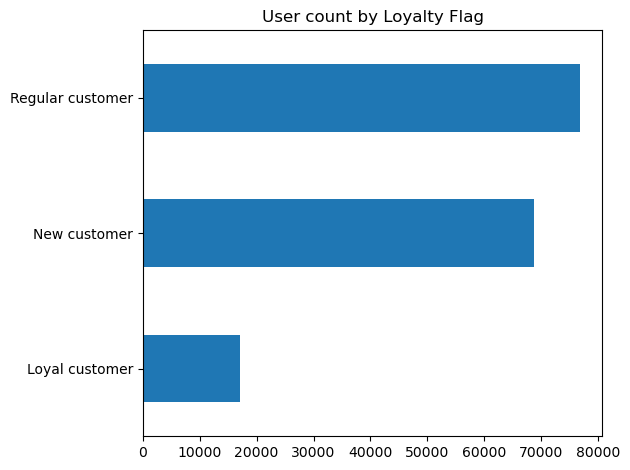

In [237]:
users_by_loyalty.plot(
    kind = 'barh',
    title = 'User count by Loyalty Flag',
    ylabel = ''
)
plt.tight_layout() # adjustment to see y label
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'user_count_by_loyalty.png'))

# Are there differences in ordering habits based on customer's loyalty status?


In [240]:
order_frequency_by_loyalty = df_excluded.groupby('loyalty_flag').agg(median_order_frequency=('days_since_prior_order', 'median'))

<Axes: title={'center': 'Average days between order by loyalty'}>

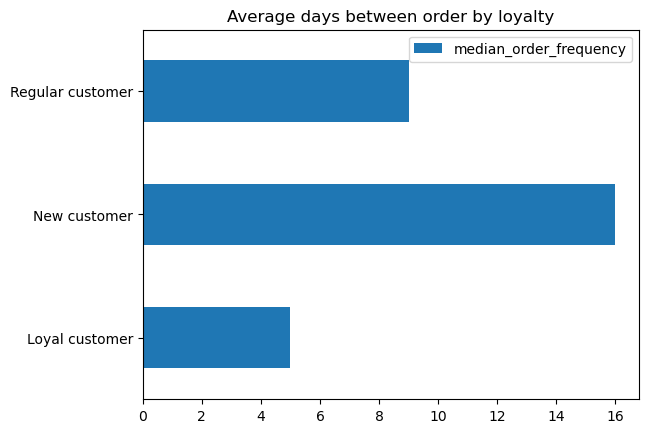

In [242]:
order_frequency_by_loyalty.plot(
    kind = 'barh',
    title = 'Average days between order by loyalty',
    ylabel = ''
)


In [244]:
order_frequency_by_loyalty.sort_values(by = 'median_order_frequency', ascending = True)

,median_order_frequency
loyalty_flag,
Loyal customer,5.0
Regular customer,9.0
New customer,16.0


# Are there differences in ordering habits based on customer's region?

In [247]:
region_order_frequency = df_excluded.groupby(['region', 'price_range_loc']).agg(
    order_frequency=('days_since_prior_order', 'mean')
).reset_index()

In [249]:
region_order_frequency

,region,price_range_loc,order_frequency
0,Midwest,High-range product,11.239839
1,Midwest,Low-range product,10.894117
2,Midwest,Mid-range product,10.885790
3,Northeast,High-range product,11.114497
4,Northeast,Low-range product,10.785713
5,Northeast,Mid-range product,10.762893
6,South,High-range product,11.147746
7,South,Low-range product,10.818481
8,South,Mid-range product,10.806144
9,West,High-range product,11.016448


In [251]:
region_order_frequency = region_order_frequency.pivot(index = 'region', columns = 'price_range_loc', values = 'order_frequency')

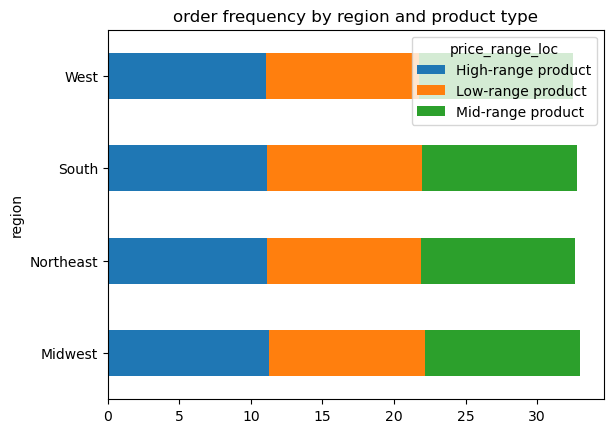

In [253]:
region_order_frequency.plot(
    kind = 'barh',
    stacked = True,
    title = 'order frequency by region and product type'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'region_order_frequency.png'))

# Is there a connection between age and family status in terms of ordering habits?

In [256]:
single_adults_order_frequency = df_excluded.groupby('single_adult').agg(order_frequency = ('days_since_prior_order', 'mean')).reset_index()

In [258]:
single_adults_order_frequency

,single_adult,order_frequency
0,N,10.809850
1,Y,10.813173


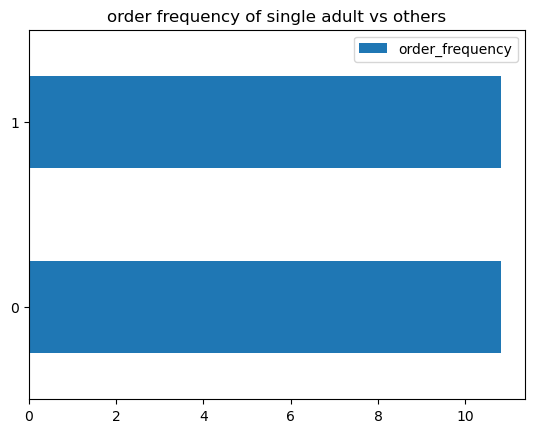

In [260]:
single_adults_order_frequency.plot(
    kind = 'barh',
    title = 'order frequency of single adult vs others'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'single_adult_order_frequency.png'))

# What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of

In [263]:
department_price_range = df_excluded.groupby(['department_id','price_range_loc'])['product_id'].nunique().reset_index()

In [265]:
department_price_low_range = department_price_range[department_price_range['price_range_loc'] == 'Low-range product'].sort_values(by = 'product_id')

In [267]:
department_price_low_range = department_price_low_range.head(5).merge(df_dep, on = 'department_id')

In [269]:
department_price_low_range

,department_id,price_range_loc,product_id,department
0,10,Low-range product,6,bulk
1,2,Low-range product,165,other
2,8,Low-range product,280,pets
3,5,Low-range product,294,alcohol
4,18,Low-range product,299,babies


In [271]:
department_price_low_range = department_price_low_range[['department', 'product_id']].sort_values(by = 'product_id', ascending = False).reset_index(drop = True)

In [273]:
department_price_low_range

,department,product_id
0,babies,299
1,alcohol,294
2,pets,280
3,other,165
4,bulk,6


In [275]:
department_price_low_range.set_index('department', inplace = True)

In [277]:
department_price_low_range

,product_id
department,
babies,299
alcohol,294
pets,280
other,165
bulk,6


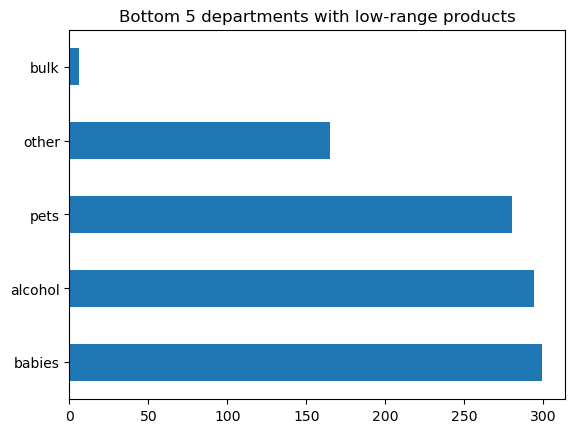

In [279]:
department_price_low_range.plot(
    kind = 'barh',
    title = 'Bottom 5 departments with low-range products',
    ylabel = '',
    legend = False
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'bottom_5_departments.png'))

In [299]:
department_high_income = df_excluded[df_excluded['income_group'] == 'High']

In [300]:
department_high_income_2 = department_high_income.groupby(['department_id']).agg(total_sales = ('prices', 'sum')).reset_index()

In [301]:
department_high_income_2

,department_id,total_sales
0,1,7741811.6
1,2,114385.2
2,3,4211578.5
3,4,34236339.3
4,5,576680.4
5,6,930768.3
6,7,8883930.6
7,8,358799.1
8,9,2910908.4
9,10,121503.2


In [305]:
department_high_income_3 = department_high_income_2.merge(df_dep, on = 'department_id')

In [307]:
department_high_income_3 = department_high_income_3.drop(columns = 'department_id')

In [309]:
department_high_income_4 = department_high_income_3.sort_values(by = 'total_sales').head(5)

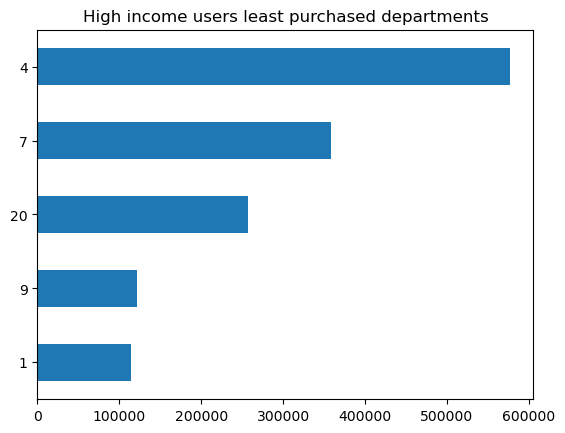

In [315]:
department_high_income_4.plot(
    kind = 'barh',
    title = 'High income users least purchased departments',
    ylabel = '',
    legend = False
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'high_income_departments.png'))

In [ ]:
df.loc[df['state'].isin(region_northeast), 'region'] = 'Northeast'

In [22]:
# Create a flag for customers with less than 5 orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [23]:
ords_prods_cust['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30992664
low-activity customer      1441548
Name: count, dtype: int64

In [24]:
# Exclude low-activity customers from the dataframe
df_excluded = ords_prods_cust[ords_prods_cust['activity_flag'] != 'low-activity customer']

In [25]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))